# K-NEARESR NEIGHBOR REGRESSION

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class KNN_Regression():
    
    def __init__(self, data, features):
        X = data[features]
        self.norms = np.linalg.norm(X, axis=0)

    def __get_distances(self, x_q, X):
        '''Euclidian distance'''
        return np.sqrt(np.sum((X - x_q)**2, axis=1))

    def __get_k_nearest_neighbors_indicies(self, x_q, X, k):
        dists = self.__get_distances(x_q, X)
        return np.argsort(dists)[0:k]    

    def knn_predict(self, X_q, X, y, k):
        predictions = list()
        X = np.array(X) / self.norms
        X_q = np.array(X_q) / self.norms
        for x_q in X_q:
            nearest_ngh_indicies = self.__get_k_nearest_neighbors_indicies(x_q, X, k)
            predictions.append(np.mean(y[nearest_ngh_indicies]))

        return predictions

def calculate_MSE(y, y_pred):
            '''Mean Square Error'''
            m = y.shape[0]
            return np.sum((y - y_pred)**2) / m

## Load Data 

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales_data = pd.read_csv("./data/house_data.csv", dtype=dtype_dict)
train = sales_data.sample(frac=0.8, random_state=0) 
test_valid = sales_data.drop(train.index)
valid = test_valid.sample(frac=0.5, random_state=5)
test = test_valid.drop(valid.index)


In [4]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
target = "price"

In [5]:
train_X = np.array(train[feature_list])
train_y = np.array(train[target])
valid_X = np.array(valid[feature_list])
valid_y = np.array(valid[target])
test_X = np.array(test[feature_list])
test_y = np.array(test[target])

## Test KNN Regression

In [6]:
knn_reg = KNN_Regression(train, feature_list)

In [7]:
k = 2
predicted = knn_reg.knn_predict(test_X, train_X, train_y , k)

## Check  Custom KNN Regression RMSE

In [8]:
np.sqrt(calculate_MSE(test_y, predicted))

221947.5316945931

## Chose best k value

In [9]:
rmse_all = list()
for k in range(1, 16):
    predict = knn_reg.knn_predict(valid_X, train_X, train_y, k)
    RMSE = np.sqrt(calculate_MSE(valid_y, predict))
    rmse_all.append(RMSE)

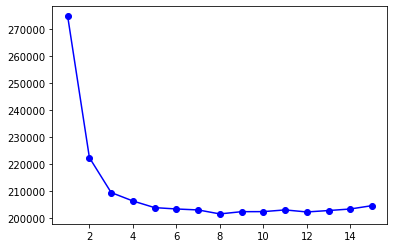

In [10]:
import matplotlib.pyplot as plt

kvals = range(1, 16)
plt.plot(kvals, rmse_all,'bo-')

## Plot Fit

In [11]:
predicted = knn_reg.knn_predict(test_X, train_X, train_y , 8)
np.sqrt(calculate_MSE(test_y, predicted))

203869.20899738907

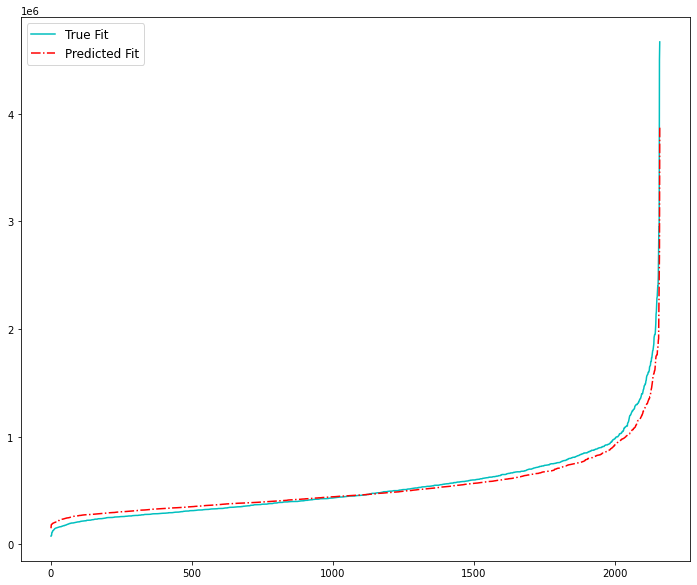

In [12]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(test_y)), np.sort(test_y), "c-", label="True Fit")
plt.plot(range(len(predicted)), np.sort(predicted), "r-.", label="Predicted Fit")
plt.legend(prop={"size":12})